In [99]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [100]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [101]:
fetch_housing_data()
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [102]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [103]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [104]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7695e4e860>,
      dtype=object)

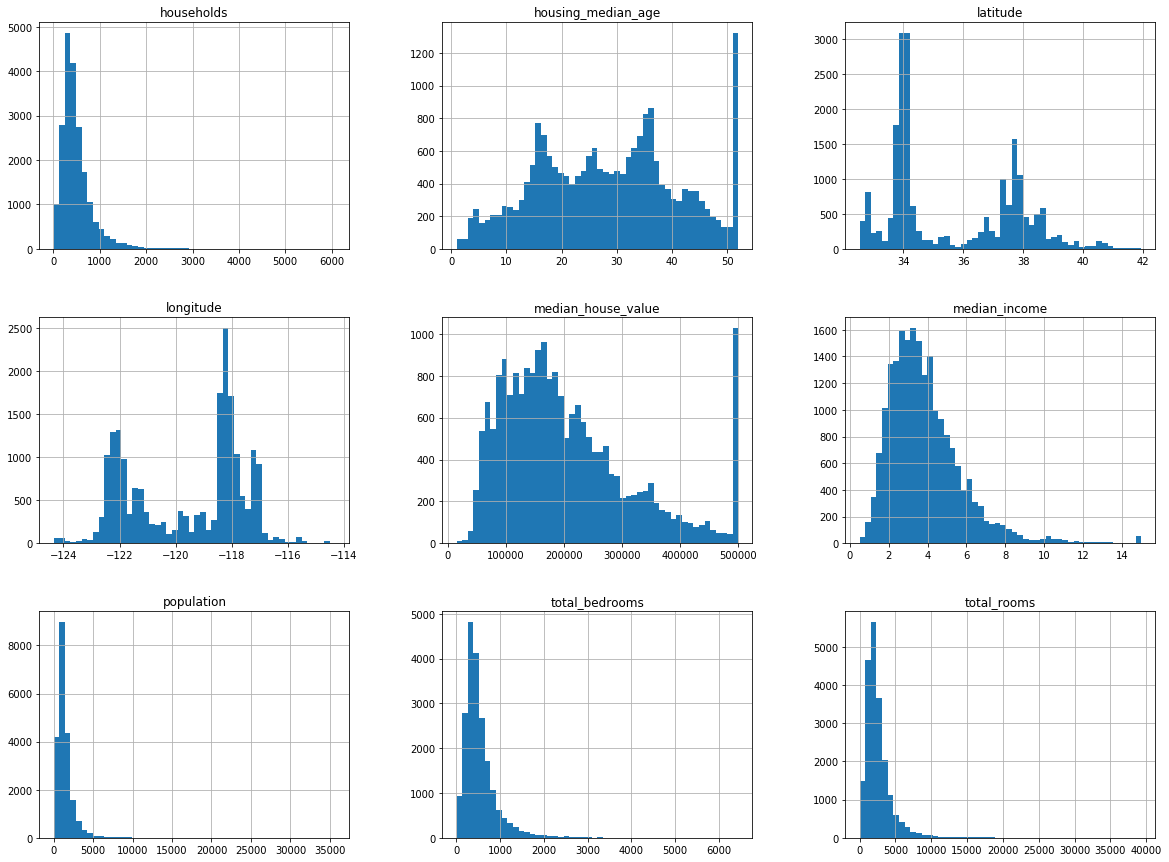

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

In [106]:
import numpy as np

In [107]:
def train_test_split(dataset, test_ratio=0.2):
    shuffled_indices=np.random.permutation(len(dataset))
    test_size=int(len(dataset)*test_ratio)
    test_indices=shuffled_indices[:test_size]
    train_indices=shuffled_indices[test_size:]
    return dataset.iloc[train_indices],dataset.iloc[test_indices]

In [108]:
train_set, test_set = train_test_split(housing)
print("training set length is: ", len(train_set), "\ntest set length is: ",len(test_set))

training set length is:  16512 
test set length is:  4128


In [109]:
from zlib import crc32
def test_set_check(ids, ratio):
    return crc32(np.int32(ids))&0xffffffff < ratio*2**32
def splitter(dataset, column, ratio):
    unique_col=dataset[column]
    bool=unique_col.apply(lambda ids : test_set_check(ids,ratio))
    return dataset.loc[~bool], dataset.loc[bool]

In [110]:
housing=housing.reset_index()

In [111]:
train_set, test_set = splitter(housing, 'index', 0.2)

In [112]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=44)

Text(0.5, 1.0, 'Median income')

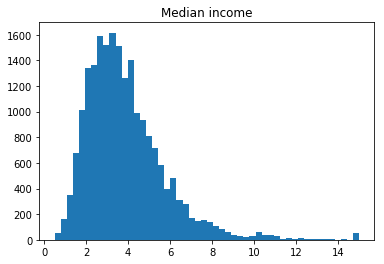

In [113]:
housing.median_income.hist(bins=50, grid=False)
plt.title('Median income')

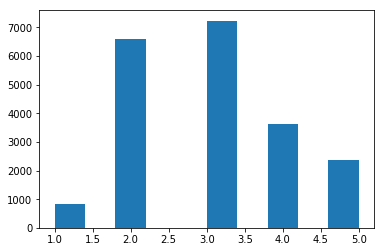

In [114]:
housing['income_cat']=pd.cut(housing['median_income'], bins=[0,1.5,3,4.5,6, np.inf], labels=[1,2,3,4,5])
housing.income_cat.hist(grid=False)

In [115]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X=housing, y=housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [116]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [117]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop(["income_cat",'index'], axis=1, inplace=True)

In [118]:
house=strat_train_set.copy()

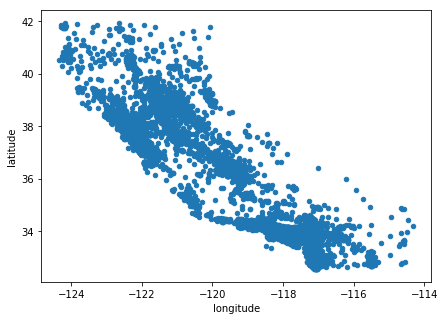

In [119]:
house.plot(kind='scatter',x='longitude', y='latitude', figsize=(7,5))

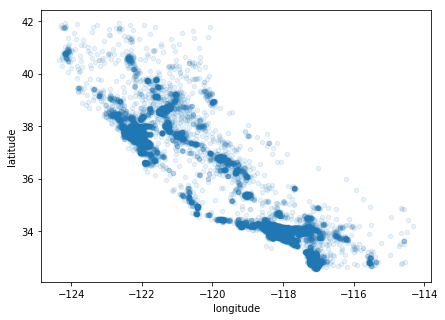

In [120]:
#to see where the high density of data points are,
house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, figsize=(7,5))

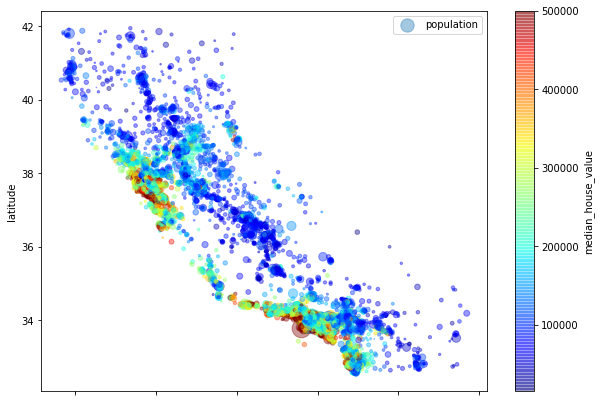

In [121]:
#lets gain population and price information
house.plot(kind='scatter', x='longitude', y='latitude',alpha=0.4, c='median_house_value', s=housing['population']/100, figsize=(10,7),
            cmap=plt.get_cmap('jet'), colorbar=True, label='population')
plt.legend()

In [122]:
corr_matrix=house.corr()

In [123]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76795e54e0>,
      dtype=object)

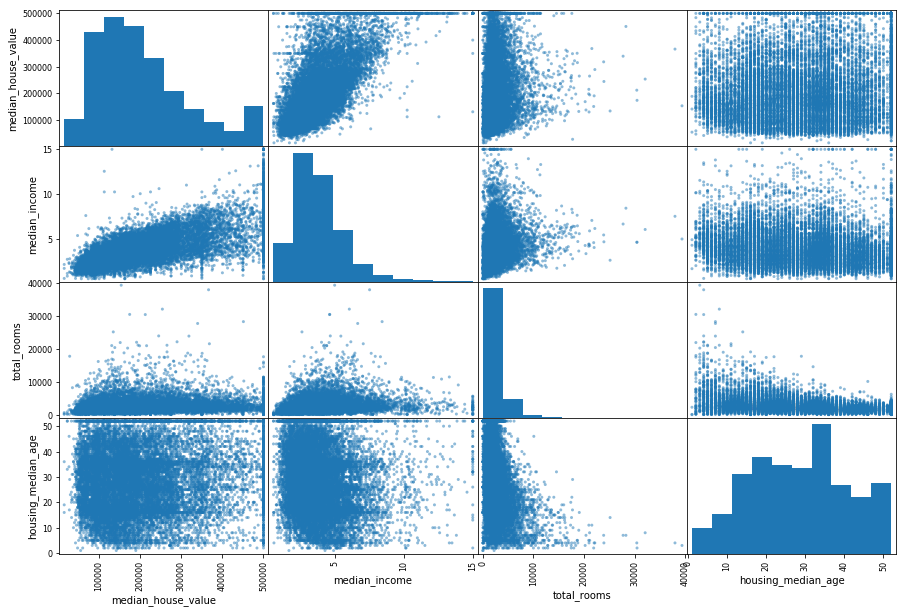

In [124]:
from pandas.plotting import scatter_matrix
attributes=['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(house[attributes], figsize=(15,10))

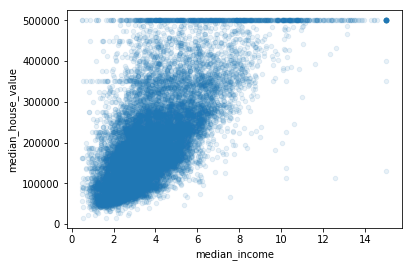

In [125]:
house.plot(kind='scatter', y='median_house_value', x='median_income', alpha=0.1)

In [126]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [127]:
house['rooms_per_household']=house['total_rooms']/house['households']
house['bedrooms_to_rooms']=house['total_bedrooms']/house['total_rooms']
house['population_to_household']=house['population']/house['households']

In [128]:
corr_matrix=house.corr()

In [129]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value         1.000000
median_income              0.687160
rooms_per_household        0.146285
total_rooms                0.135097
housing_median_age         0.114110
households                 0.064506
total_bedrooms             0.047689
population_to_household   -0.021985
population                -0.026920
longitude                 -0.047432
latitude                  -0.142724
bedrooms_to_rooms         -0.259984
Name: median_house_value, dtype: float64

In [130]:
house=strat_train_set.drop('median_house_value', axis=1)
house_label=strat_train_set['median_house_value'].copy()

<h3>There are three ways to deal with missing data</h3>
<li>Drop the missing rows</li>
<li>Drop the attribute with the missing values</li>
<li>Fill the missing values with Median, Mean, Zero</li>

In [131]:
# house.dropna(['total_rooms'])
# house.drop(['total_rooms'])
# house['total_rooms'].fillna(value=house['total_rooms'].median(), inplace=True)

<h3>Alternatively we can also use sklearn imputer function</h3>

In [132]:
from sklearn.impute import SimpleImputer
simputer=SimpleImputer(strategy='median')

In [133]:
#Sklearn imputer can only handle numerical features, so we drop cat features in our df
house_imp=strat_train_set.drop(['ocean_proximity'], axis=1)
simputer.fit(house_imp)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [134]:
#imputer stores the imputed values in statistics instance
simputer.statistics_

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1195e+03,  4.3300e+02,
        1.1640e+03,  4.0800e+02,  3.5409e+00,  1.7950e+05])

In [135]:
#same as calling imputer.statistics_
house_imp.median() #house_imp.median().values

longitude               -118.5100
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2119.5000
total_bedrooms           433.0000
population              1164.0000
households               408.0000
median_income              3.5409
median_house_value    179500.0000
dtype: float64

In [136]:
X=simputer.transform(house_imp)
type(X) #results in numpy array

numpy.ndarray

In [137]:
#to change the numpy array to df
housing_tr=pd.DataFrame(X, columns=house_imp.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0


In [138]:
housing_tr.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
dtypes: float64(9)
memory usage: 1.1 MB


In [139]:
house_cat=strat_train_set[['ocean_proximity']]
house_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [140]:
from sklearn.preprocessing import OrdinalEncoder
ordencoder=OrdinalEncoder()
house_cat_coded=ordencoder.fit_transform(house_cat)
house_cat_coded[:5]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.]])

In [141]:
ordencoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [142]:
from sklearn.preprocessing import OneHotEncoder
onecoder=OneHotEncoder()
house_cat_1hot = onecoder.fit_transform(house_cat)
house_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [143]:
#sparse matrix stores only the location of non-zero elements
#to have a look at the sparse matrix, convert it to np array
house_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [144]:
onecoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [145]:
from sklearn.base import BaseEstimator, TransformerMixin

In [146]:
class attraddr(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroom_to_rooms=True):
        self.add_bedroom_to_rooms=add_bedroom_to_rooms
    def fit(self, X, y=None):
            return self
    def transform(self, X, y=None):
            room_per_household= X[:,rooms_ix] / X[:,household_ix]
            population_per_household=X[:,population_ix] / X[:,household_ix]
            if self.add_bedroom_to_rooms:
                bedroom_to_rooms=X[:,bedroom_ix] / X[:,rooms_ix]
                return np.c_[X, room_per_household, population_per_household, bedroom_to_rooms]
            else:
                return np.c_[X, room_per_household, population_per_household]

In [147]:
rooms_ix,household_ix,population_ix,bedroom_ix = 3,4,5,6

In [148]:
attr_adder=attraddr(add_bedroom_to_rooms=False)
house_class_calculated=attr_adder.transform(housing_tr.values)

In [149]:
house_class_calculated.shape

(16512, 11)

In [150]:
col_names=list(corr_matrix.columns)
col_names.remove('bedrooms_to_rooms')

In [151]:
pd.DataFrame(house_class_calculated,columns=col_names).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_to_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,4.467236,2.022792
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,6.287037,2.833333
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,4.144374,1.987261
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,4.978437,3.935310
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,4.322623,2.923934


In [152]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [153]:
numpipe=Pipeline([('imputer', SimpleImputer(strategy='median')),
                  ('combinator', attraddr()),
                  ('scaler', StandardScaler())])

In [154]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
cat_features=['ocean_proximity']

In [155]:
pipeline=ColumnTransformer([('num',numpipe,num_features),
                           ('cat',OneHotEncoder(), cat_features)])

In [156]:
#ColumnTransformer outputs dense or sparsematrix depending on the sparse_threshold
prepared=pipeline.fit_transform(house)

In [157]:
from sklearn.linear_model import LinearRegression

lin_model=LinearRegression()
lin_model.fit(prepared, house_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [158]:
data=house.iloc[:5]
data_label=house_label[:5]

In [159]:
feed_in=pipeline.transform(data)

In [160]:
print('Predictions:',lin_model.predict(feed_in))

Predictions: [210944.86691742 319426.25530201 212204.86488066  59126.93203499
 186471.17573379]


In [161]:
print('Labels:',list(data_label))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [162]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_model.predict(prepared)
lin_mse=mean_squared_error(house_label, housing_predictions)
lin_mse=np.sqrt(lin_mse)
lin_mse

68893.95511338534

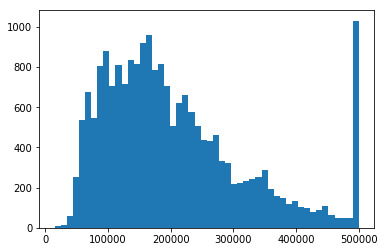

In [163]:
housing['median_house_value'].hist(bins=50, grid=False)

In [164]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(prepared, house_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [165]:
housing_predictions=tree.predict(prepared)
tree_mse=mean_squared_error(house_label, housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [166]:
#girdsearch, cross validation try to maximize its score so loss functions like MSE have to be negated
from sklearn.model_selection import cross_val_score

In [167]:
tree_scores = cross_val_score(tree, prepared, house_label, scoring='neg_mean_squared_error', cv=10)
tree_rmse=np.sqrt(-scores)

In [168]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean scores: ', scores.mean())
    print('Std deviation: ', scores.std())

In [169]:
display_scores(tree_rmse)

Scores:  [67002.76831841 67268.16187489 68289.17964023 75269.42572222
 68218.04577713 71497.36926105 65223.68755442 68364.20268219
 72844.80614732 67852.92003883]
Mean scores:  69183.05670166874
Std deviation:  2899.577053435299


In [170]:
lin_scores=cross_val_score(lin_model, prepared, house_label, scoring='neg_mean_squared_error', cv=10)
lin_rmse=np.sqrt(-lin_scores)

In [171]:
display_scores(lin_rmse)

Scores:  [67002.76831841 67268.16187489 68289.17964023 75269.42572222
 68218.04577713 71497.36926105 65223.68755442 68364.20268219
 72844.80614732 67852.92003883]
Mean scores:  69183.05670166874
Std deviation:  2899.577053435299


In [172]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
forest_scores=cross_val_score(reg, prepared, house_label, cv=10, scoring='neg_mean_squared_error')
forest_rmse=np.sqrt(-forest_scores)
display_scores(forest_rmse)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nbuser/anaconda3_501/l

Scores:  [52186.22043303 49148.22742754 51995.44150258 56211.65670523
 52081.39860326 55253.73237282 51754.34463155 51892.68514879
 56383.05697858 54214.89679721]
Mean scores:  53112.16606005859
Std deviation:  2198.1456687279688


In [173]:
reg.fit(prepared, house_label)
preds=reg.predict(prepared)
score=np.sqrt(mean_squared_error(preds, house_label))
score

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


22576.90343672413

In [174]:
'''save the model's trained parameters, hyperparameters, cross validation scores, predictions in a pickle file
this can be later used to compare models and the errors they make
python pickle module or sklearn joblib can be used for this '''

# from sklearn.externals import joblib
# joblib.dump(model_name, 'this model.pkl')

'''later load this model using,'''

# loaded_model=joblib.load('this_model.pkl')

'later load this model using,'

In [175]:
from sklearn.model_selection import GridSearchCV

params=[{'n_estimators':[3,10,20,30], 'max_features':[2,4,6,8]},
       {'bootstrap':[False], 'n_estimators':[5,10,15], 'max_features':[2,3,4]}]

forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg, param_grid=params, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(prepared, house_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 20, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [5, 10, 15], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [176]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [180]:
from sklearn.model_selection import RandomizedSearchCV

params={'n_estimators':[30,40,45], 'max_features':[6,7,8]}

randomsearch= RandomizedSearchCV(forest_reg, params, cv=5)

randomsearch.fit(prepared, house_label)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [30, 40, 45], 'max_features': [6, 7, 8]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [184]:
randomcv_results=randomsearch.cv_results_
randomcv_results

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anacon

{'mean_fit_time': array([3.32799439, 4.40102396, 5.31084709, 3.91351466, 5.62164807,
        5.87424397, 4.41346335, 5.90961123, 6.83278904]),
 'std_fit_time': array([0.24860977, 0.20793179, 0.23190055, 0.21133553, 0.6696416 ,
        0.1699695 , 0.30258699, 0.19358785, 0.31902485]),
 'mean_score_time': array([0.06729579, 0.08282351, 0.1015481 , 0.07192092, 0.10771594,
        0.09048223, 0.05342898, 0.08764377, 0.09005451]),
 'std_score_time': array([0.01261034, 0.01207166, 0.01859614, 0.0140591 , 0.01857635,
        0.008297  , 0.00711271, 0.01233258, 0.01331099]),
 'param_n_estimators': masked_array(data=[30, 40, 45, 30, 40, 45, 30, 40, 45],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[6, 6, 6, 7, 7, 7, 8, 8, 8],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_valu

In [197]:
gridcv_results=grid_search.cv_results_

In [198]:
for mean_score, params in zip(gridcv_results['mean_test_score'], gridcv_results['params']):
               print(np.sqrt(-mean_score),y)

64906.13988254142 {'n_estimators': 45, 'max_features': 8}
56064.01798360771 {'n_estimators': 45, 'max_features': 8}
53645.563687634225 {'n_estimators': 45, 'max_features': 8}
53317.942698873805 {'n_estimators': 45, 'max_features': 8}
61644.73353904386 {'n_estimators': 45, 'max_features': 8}
53222.80566456082 {'n_estimators': 45, 'max_features': 8}
51465.023849276935 {'n_estimators': 45, 'max_features': 8}
50671.50951904434 {'n_estimators': 45, 'max_features': 8}
59111.382396708446 {'n_estimators': 45, 'max_features': 8}
52634.45763586538 {'n_estimators': 45, 'max_features': 8}
51059.43832959357 {'n_estimators': 45, 'max_features': 8}
50173.86185548756 {'n_estimators': 45, 'max_features': 8}
59282.87050117619 {'n_estimators': 45, 'max_features': 8}
52378.38855664255 {'n_estimators': 45, 'max_features': 8}
50880.751333141496 {'n_estimators': 45, 'max_features': 8}
50204.38674066579 {'n_estimators': 45, 'max_features': 8}
58314.8737007452 {'n_estimators': 45, 'max_features': 8}
54423.2233

In [209]:
feature_importance=grid_search.best_estimator_.feature_importances_

In [207]:
extra_attribs=["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
list(pipeline.named_transformers_['cat'].categories_[0])

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [208]:
attributes=num_features+extra_attribs+list(pipeline.named_transformers_['cat'].categories_[0])

In [211]:
sorted(zip(feature_importance,attributes), reverse=True)

[(0.35495360044982033, 'median_income'),
 (0.14735570509066725, 'INLAND'),
 (0.09934881686346472, 'pop_per_hhold'),
 (0.07601368327834691, 'rooms_per_hhold'),
 (0.07224652950184535, 'longitude'),
 (0.0674306493769805, 'latitude'),
 (0.04567790118780245, 'bedrooms_per_room'),
 (0.0451551233982578, 'housing_median_age'),
 (0.019420067857787725, 'total_rooms'),
 (0.018421530494304113, 'population'),
 (0.01841673483753804, 'households'),
 (0.016251822975074916, 'total_bedrooms'),
 (0.011477564506444401, '<1H OCEAN'),
 (0.005670449358364366, 'NEAR OCEAN'),
 (0.00211365139359493, 'NEAR BAY'),
 (4.616942970613564e-05, 'ISLAND')]

In [213]:
final_model=grid_search.best_estimator_

In [214]:
X_test=strat_test_set.drop(['median_house_value'], axis=1)
y_test=strat_test_set.median_house_value.copy()

X_test_prepared=pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse=mean_squared_error(y_test, final_predictions)
final_rmse=np.sqrt(final_mse)

final_rmse

47931.4629732709

In [215]:
from scipy import stats

confidence=0.95
squared_difference = (final_predictions-y_test)**2

In [233]:
np.sqrt(stats.t.interval(confidence,len(squared_difference)-1,loc=squared_difference.mean(),scale=stats.sem(squared_difference)))

array([45979.52398985, 49806.96396271])

In [236]:
from sklearn.svm import SVR
supp_vec=SVR()
supp_vec.fit(prepared, house_label)

svm_predictions=supp_vec.predict(prepared)
svm_rmse=np.sqrt(mean_squared_error(house_label, svm_predictions))
svm_rmse

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


118572.33319832454

In [237]:
supp_vec_linear=SVR(kernel='linear')
supp_vec.fit(prepared, house_label)

svm_predictions=supp_vec.predict(prepared)
svm_rmse=np.sqrt(mean_squared_error(house_label, svm_predictions))
svm_rmse

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


118572.33319832454